Jupyter Notebook to analyze ufo sightings and weather trends

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [49]:
# Import ufo dataframe with weather info
ufo_weather = pd.read_csv("Resources/ufo_sample_weather.csv")
# Rename columns for graphing
ufo_weather = ufo_weather.rename(columns={"temp": "Temperature (F)", "humidity": "Humidity", 
                                        "cloudcover": "Cloud Cover", "visibility": "Visibility", 
                                        "heatindex": "Heat Index", "moon_illumination": "Moon Illumination", 
                                        "sightings": "UFO Sightings"})
ufo_weather.head()

,Unnamed: 0,city,year,UFO Sightings,date_time,date,time,Temperature (F),Humidity,Cloud Cover,Visibility,Heat Index,Moon Illumination
0,27520,Charlottesville,2013,1,03-30 20:20:00,2013-03-30,20,41,72,26,6,41,72
1,23379,Reading,2012,1,02-28 23:57:00,2012-02-28,23,46,96,56,3,46,42
2,33411,Huntsville,2014,1,05-01 20:30:00,2014-05-01,20,52,76,10,6,52,9
3,33528,Amherst,2010,1,05-12 23:30:00,2010-05-12,23,37,90,7,6,37,0
4,5380,Phoenix,2008,1,10-05 10:20:00,2008-10-05,10,73,43,7,6,75,35


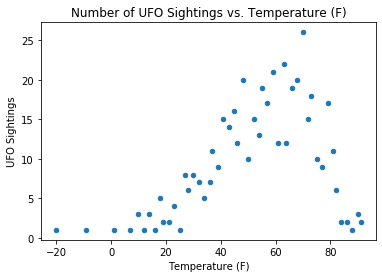

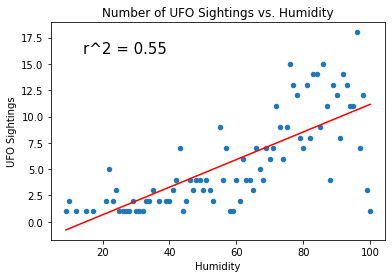

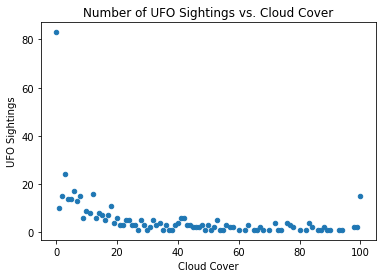

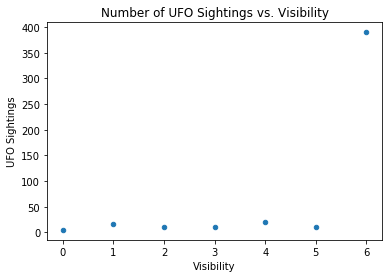

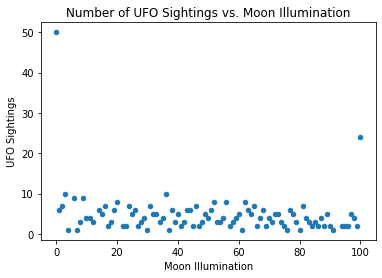

In [74]:
# Plot comparisons for sightings vs. weather varaibles
variables = ["Temperature (F)", "Humidity", "Cloud Cover", "Visibility", "Moon Illumination"]

for x in variables:
    ufo_x = ufo_weather.groupby(x).count()
    ufo_x = ufo_x.reset_index()
    ufo_x.plot(kind="scatter", y="UFO Sightings", x=x, 
                  title=f"Number of UFO Sightings vs. {x}")
    
    if x=="Humidity":
        (slope, intercept, rvalue, pvalue, sterr) = linregress(ufo_x[x], ufo_x["UFO Sightings"])
        regressValues = (slope*ufo_x[x]) + intercept
        plt.plot(ufo_x[x], regressValues, "red")
        plt.annotate(f"r^2 = {round(rvalue**2,2)}",(ufo_x[x].min()+5,ufo_x["UFO Sightings"].max()-2),fontsize=15,color="black")
    
    save = x.replace(" ", "_").lower()
    plt.savefig(f"Weather_Graphs/{save}_ufo.png")

In [76]:
print("The recorded temperatures of UFO sightings were between", 
      ufo_weather["Temperature (F)"].min(), "F", "and", 
      ufo_weather["Temperature (F)"].max(), "F")
print("The mean temperature of UFO sightings was:", 
      round(ufo_weather["Temperature (F)"].mean(),2), "F")
print("The most common temperature of UFO sightings was:", 
      ufo_weather["Temperature (F)"].mode()[0], "F")
print("The median temperature of UFO sightings was:", 
      ufo_weather["Temperature (F)"].median(), "F")

std_hi = round(ufo_weather["Temperature (F)"].mean() + ufo_weather["Temperature (F)"].std(), 2)
std_low = round(ufo_weather["Temperature (F)"].mean() - ufo_weather["Temperature (F)"].std(), 2)
print("68% (1 Standard Deviation) of UFO sightings occured between", std_low, "F and", std_hi, "F")

The recorded temperatures of UFO sightings were between -20 F and 91 F
The mean temperature of UFO sightings was: 55.45 F
The most common temperature of UFO sightings was: 70 F
The median temperature of UFO sightings was: 57.0 F
68% (1 Standard Deviation) of UFO sightings occured between 37.45 F and 73.46 F
